In [ ]:
import pandas as pd
import sklearn
import seaborn as sns

df_data = pd.read_excel("Datos python.xlsx")
#df_data = pd.read_csv("Datos python.csv")
df_data.head()


,Y,X1,X2,X3,X4
0,"78,5",7,26,6,60
1,"74,3",1,29,15,52
2,"104,3",11,56,8,20
3,"87,6",11,31,8,47
4,"95,9",7,52,6,33


In [ ]:
df_data.info
df_data.describe()


,X1,X2,X3,X4
count,13.000000,13.000000,13.000000,13.00000
mean,7.461538,48.153846,11.769231,30.00000
std,5.882394,15.560881,6.405126,16.73818
min,1.000000,26.000000,4.000000,6.00000
25%,2.000000,31.000000,8.000000,20.00000
50%,7.000000,52.000000,9.000000,26.00000
75%,11.000000,56.000000,17.000000,44.00000
max,21.000000,71.000000,23.000000,60.00000


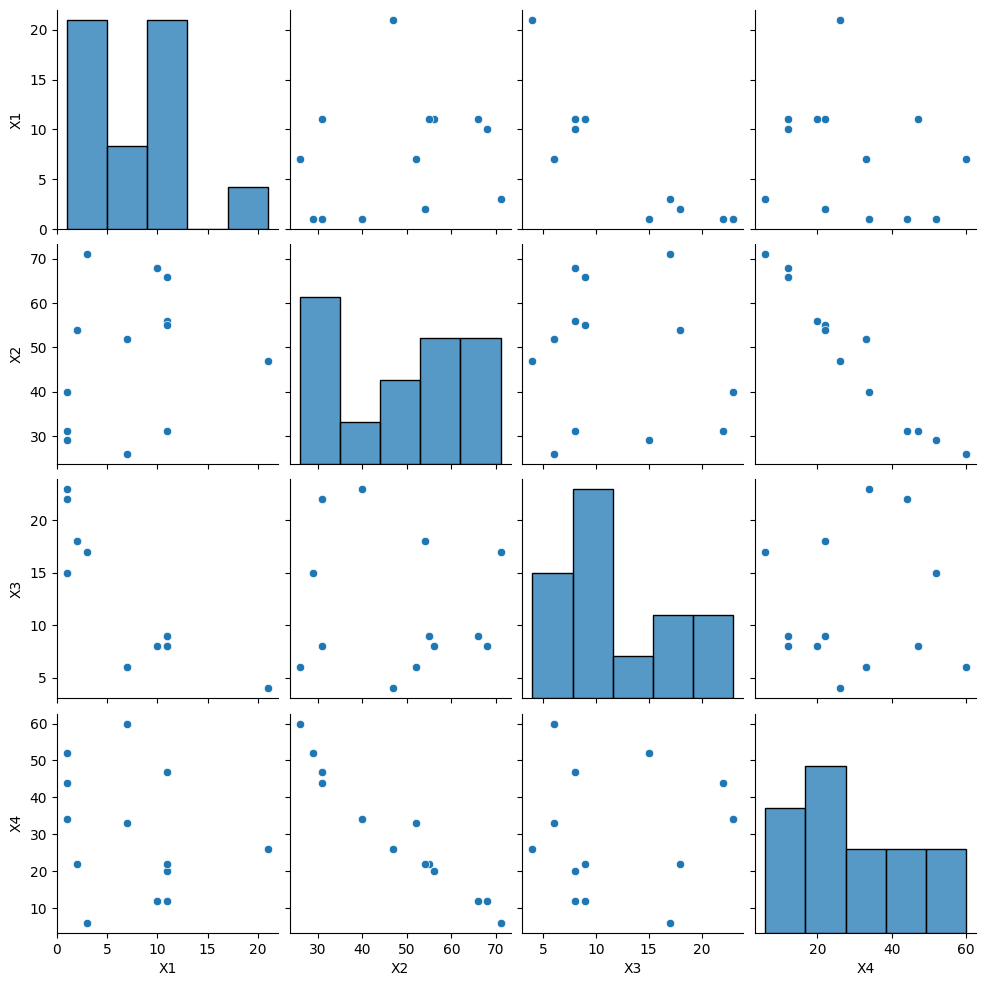

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de cargar tus datos. Si usas un archivo de Excel, usa:
df_data = pd.read_excel("Datos python.xlsx")

# Si usas un archivo CSV, usa:
# df_data = pd.read_csv("Datos python.csv")

# Selecciona las columnas que quieres incluir en la matriz de gráficos
# En tu caso, probablemente quieras incluir X1, X2, X3, X4 y Y
variables_a_graficar = ["X1", "X2", "X3", "X4", "Y"]
df_subconjunto = df_data[variables_a_graficar]

# Crea la matriz de gráficos
sns.pairplot(df_subconjunto)

# Muestra el gráfico
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# extrayendo la información del xlsx
X  = df_data[["X1", "X2", "X3", "X4"]]
y = df_data["Y"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(9, 4)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd # Import pandas again just in case the environment was reset

# Asegúrate de cargar tus datos. Si usas un archivo de Excel, usa:
df_data = pd.read_excel("Datos python.xlsx")

# Si usas un archivo CSV, usa:
# df_data = pd.read_csv("Datos python.csv")

# Convertir la columna 'Y' a numérico, manejando la coma como separador decimal
# Primero, asegurarnos de que la columna sea de tipo string para aplicar .str.replace()
df_data['Y'] = df_data['Y'].astype(str).str.replace(',', '.')
# Luego, convertir a float. errors='coerce' convertirá cualquier valor no válido a NaN
df_data['Y'] = pd.to_numeric(df_data['Y'], errors='coerce')

# extrayendo la información del xlsx
X  = df_data[["X1", "X2", "X3", "X4"]]
y = df_data["Y"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

(9, 4)
La pendiente del modelo (B) es: [-11.65436526  -5.8934546   -9.10012746  -7.11133286], el intersecto (A) es 774.8650423509571


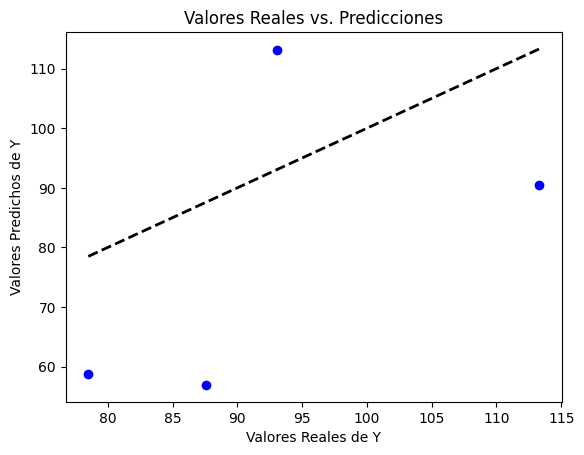

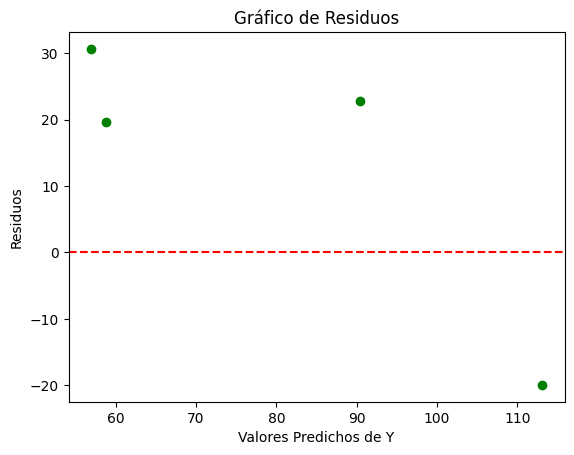

In [12]:
import matplotlib.pyplot as plt

y_pred = regressor.predict(X_test)

# Graficar los valores reales vs. los valores predichos
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Valores Reales de Y')
plt.ylabel('Valores Predichos de Y')
plt.title('Valores Reales vs. Predicciones')

# Opcional: Agregar una línea diagonal para referencia (donde y_test == y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

# Calcular los residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.scatter(y_pred, residuos, color='green')
plt.xlabel('Valores Predichos de Y')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='red', linestyle='--') # Línea horizontal en 0 para referencia
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np # Necesario para np.sqrt

# Asegúrate de que 'regressor' esté entrenado y 'X_test', 'y_test' estén definidos
# Si estás ejecutando esto en una nueva celda, asegúrate de que las variables de las celdas anteriores estén disponibles.
# Si no, necesitarías volver a ejecutar las celdas anteriores para cargar los datos, dividir en train/test y entrenar el regresor.

# Obtener las predicciones del modelo para el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular las métricas de error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calcular la raíz cuadrada del MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de error
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 562.3224260563429
Raíz del Error Cuadrático Medio (RMSE): 23.71333856833202
Error Absoluto Medio (MAE): 23.29651748293737
Coeficiente de Determinación (R²): -2.4527566752890633
